In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sms = pd.read_csv('C:\\Users\\ASUS\\OneDrive\\Desktop\\spam.csv',encoding='latin-1')

In [3]:
sms.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1635,ham,You have come into my life and brought the sun...,NaN,NaN,NaN
3252,ham,K:)k..its good:)when are you going?,NaN,NaN,NaN
4818,ham,Got smaller capacity one? Quite ex...,NaN,NaN,NaN
1520,spam,"URGENT! Your Mobile No was awarded a å£2,000 B...",NaN,NaN,NaN
4005,ham,IM FINE BABES AINT BEEN UP 2 MUCH THO! SAW SCA...,NaN,NaN,NaN
2265,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
1132,ham,Good morning princess! How are you?,NaN,NaN,NaN
4726,spam,Had your mobile 10 mths? Update to the latest ...,NaN,NaN,NaN
3482,ham,"Hello, my love! How goes that day ? I wish you...",NaN,NaN,NaN
167,ham,"Hi frnd, which is best way to avoid missunders...",NaN,NaN,NaN


# Data cleaning 

In [4]:
sms.shape

(5572, 5)

In [5]:
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
sms.rename(columns={'v1':'target','v2':'text'},inplace = True)

In [9]:
sms.sample(10)

,target,text
3721,ham,I'm in a movie... Collect car oredi...
5386,ham,I'm at work. Please call
1721,ham,Am watching house ÛÒ very entertaining ÛÒ am...
3114,ham,I wait 4 Ì_ inside da car park...
1693,ham,Was gr8 to see that message. So when r u leavi...
4032,ham,I am taking you for italian food. How about a ...
2377,spam,YES! The only place in town to meet exciting a...
2597,ham,"Got fujitsu, ibm, hp, toshiba... Got a lot of ..."
3305,ham,HI DARLIN I FINISH AT 3 DO U 1 2 PICK ME UP OR...
4075,spam,87077: Kick off a new season with 2wks FREE go...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
sms['target'] = encoder.fit_transform(sms['target'])

In [12]:
sms.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [13]:
#misssing values
sms.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#duplicate values
sms.duplicated().sum()

403

In [15]:
sms = sms.drop_duplicates(keep='first')  #keeping the first and removing other duplicates 

In [16]:
sms.duplicated().sum()

0

In [17]:
sms.shape

(5169, 2)

## data cleaning is done

# EDA

In [18]:
sms['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

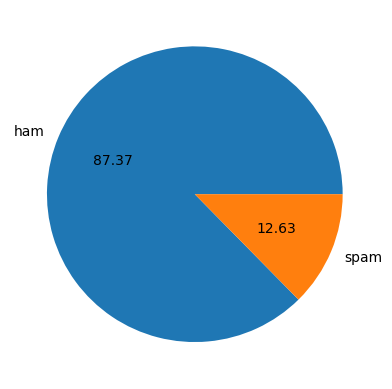

In [19]:
plt.pie(sms['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

 Data is imbalanced 

In [20]:
import nltk

In [21]:
sms['num_of_char']=sms['text'].apply(len)

In [22]:
sms['num_of_words']=sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
sms['num_of_sentences']=sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
sms.describe()

,target,num_of_char,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [25]:
# ham messages
sms[sms['target'] == 0][['num_of_char','num_of_words','num_of_sentences']].describe()

,num_of_char,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
# spam messages
sms[sms['target'] == 1][['num_of_char','num_of_words','num_of_sentences']].describe()

,num_of_char,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_of_char', ylabel='Count'>

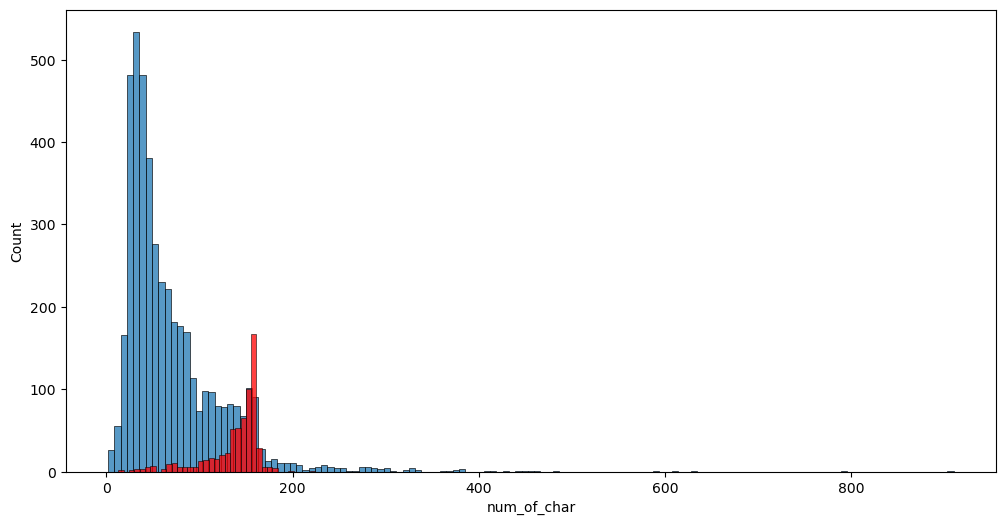

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(sms[sms['target']==0]['num_of_char'])
sns.histplot(sms[sms['target']==1]['num_of_char'],color = 'red')

<Axes: xlabel='num_of_words', ylabel='Count'>

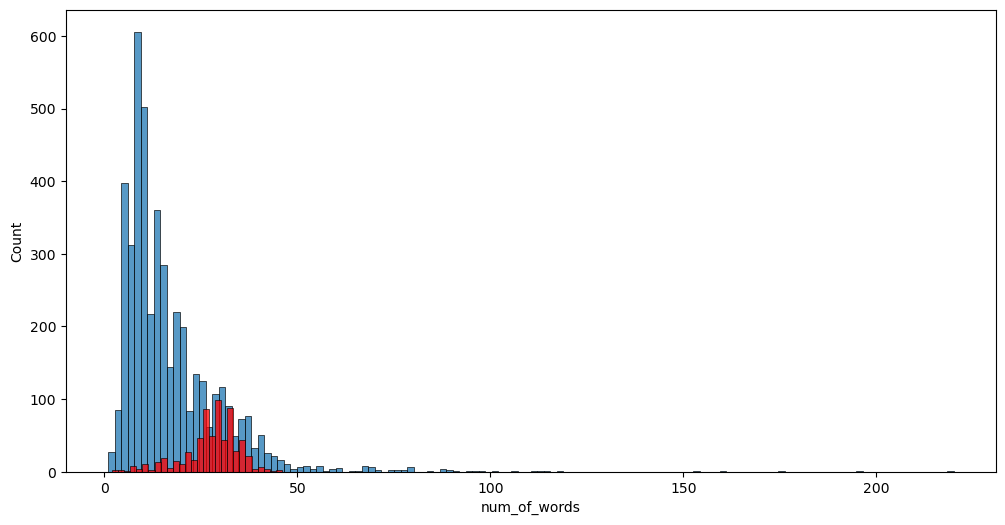

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(sms[sms['target']==0]['num_of_words'])
sns.histplot(sms[sms['target']==1]['num_of_words'],color = 'red')

<Axes: xlabel='num_of_sentences', ylabel='Count'>

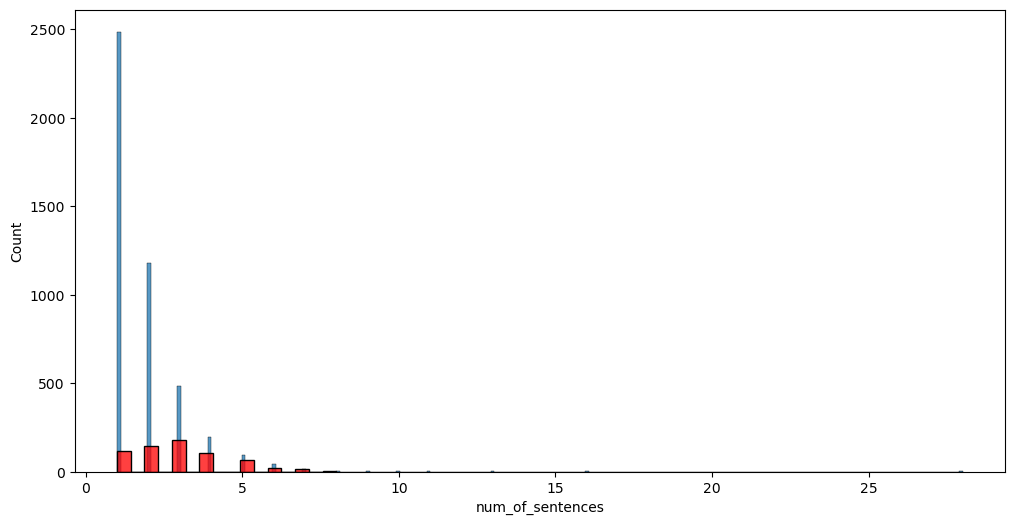

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(sms[sms['target']==0]['num_of_sentences'])
sns.histplot(sms[sms['target']==1]['num_of_sentences'],color = 'red')

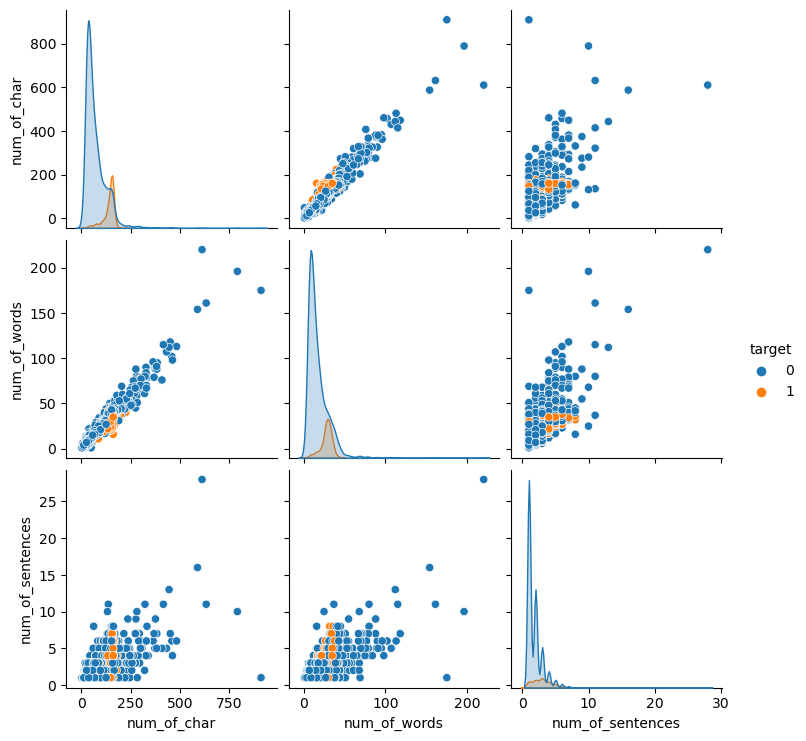

In [30]:
sns.pairplot(sms,hue='target')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12012\2372613765.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sms.corr(),annot=True)


<Axes: >

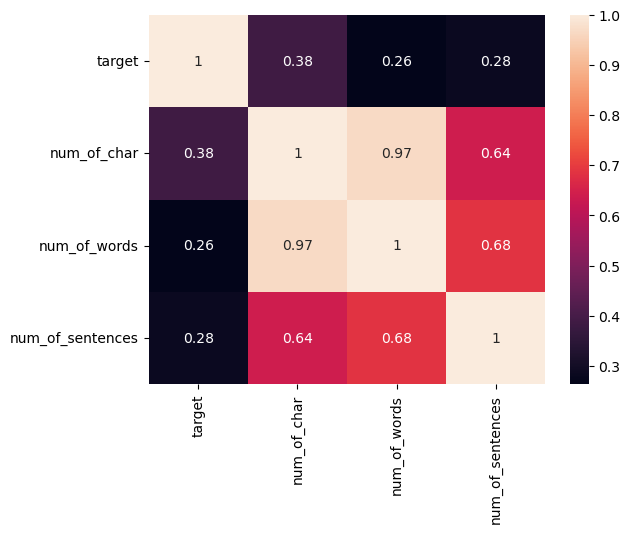

In [31]:
sns.heatmap(sms.corr(),annot=True)

# Data Preprocessing


In [32]:
from nltk.corpus import stopwords
import string

In [33]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
sms['transformed_text'] = sms['text'].apply(transform_text)

In [36]:
sms.head()

,target,text,num_of_char,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=800,min_font_size=10,background_color='black')

In [38]:
spam_wc=wc.generate(sms[sms['target']==1]['transformed_text'].str.cat(sep=" "))

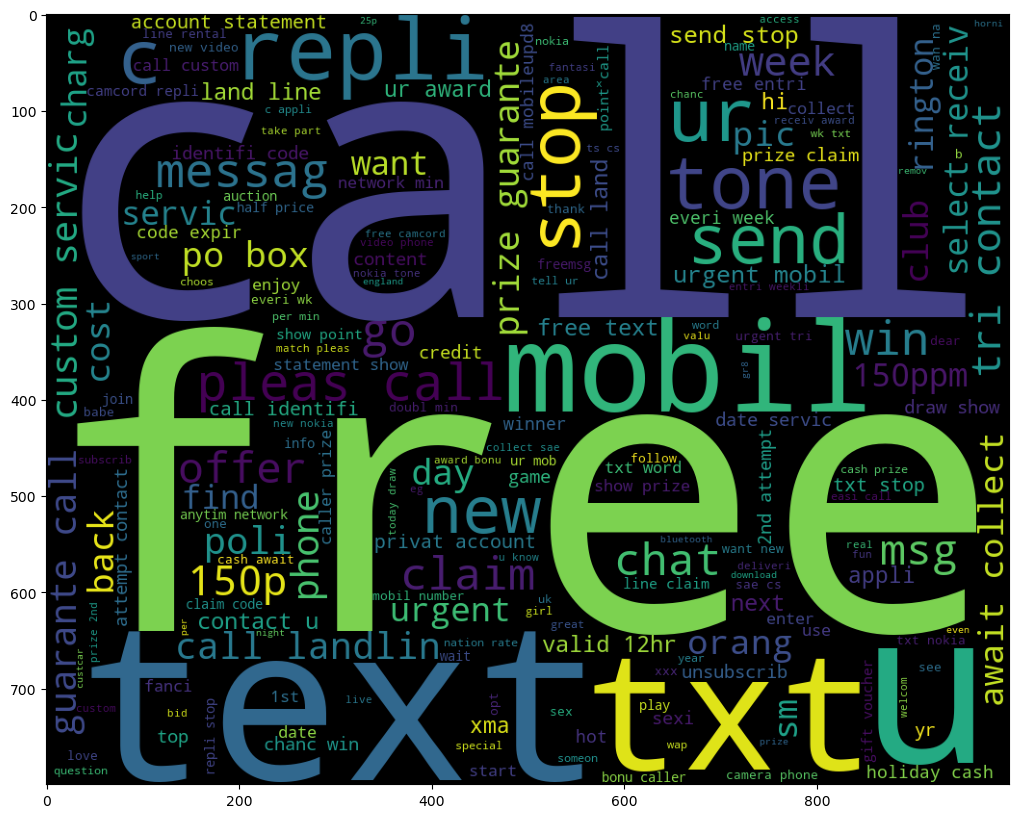

In [39]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [40]:
ham_wc=wc.generate(sms[sms['target']==0]['transformed_text'].str.cat(sep=" "))

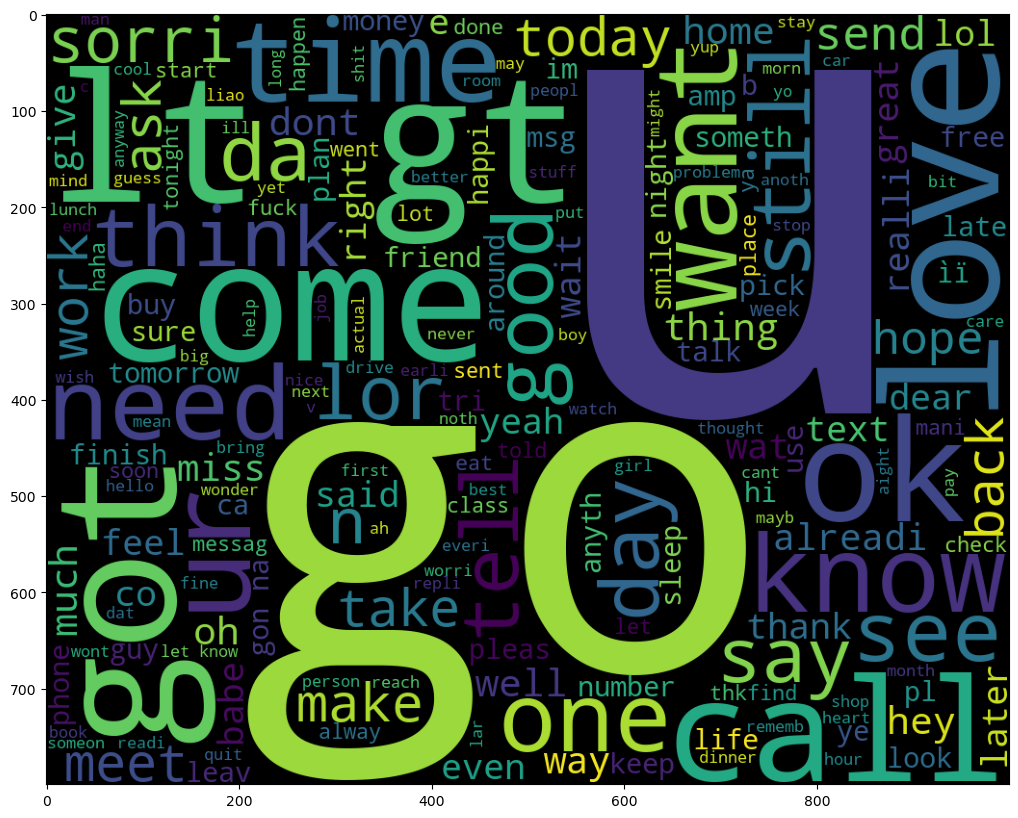

In [41]:
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)

In [42]:
spam_corpus=[]
for msg in sms[sms['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [43]:
len(spam_corpus)

9939

In [44]:
from collections import Counter

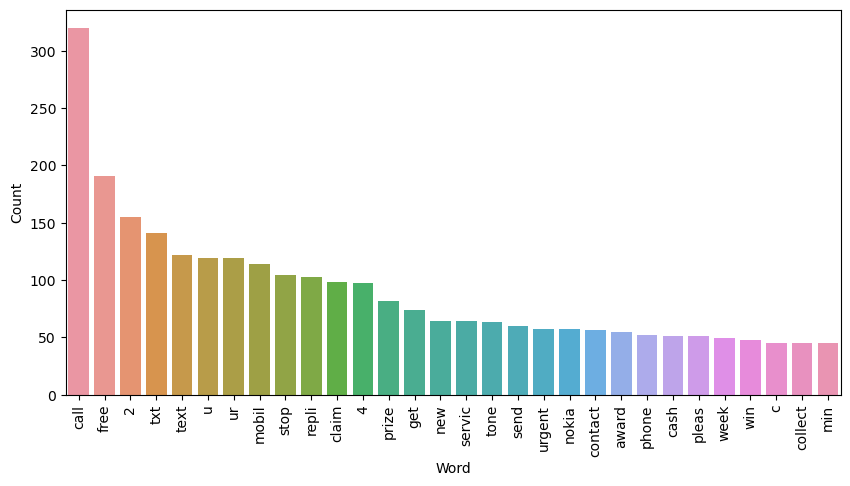

In [45]:
spam_counter = Counter(spam_corpus)
most_common_30 = spam_counter.most_common(30)

# Create a DataFrame from the Counter results
df = pd.DataFrame(most_common_30, columns=["Word", "Count"])

# Create the barplot using Seaborn
plt.figure(figsize=(10,5))
sns.barplot(x="Word", y="Count", data=df)
plt.xticks(rotation='vertical')
plt.show()


# Model building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
x = tfidf.fit_transform(sms['transformed_text']).toarray()

In [48]:
# from sklearn.preprocessing import MinMaxScaler
# scaler =MinMaxScaler()
# x = scaler.fit_transform(x)

In [49]:
#x = np.hstack((x,sms['num_of_char'].values.reshape(-1,1)))

In [50]:
x.shape

(5169, 3000)

In [51]:
y = sms['target'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [69]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [59]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [60]:
#tfidf---> mnb


### Checking for other than naive bayes for our classification.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [133]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [134]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [135]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [136]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [137]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [138]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


In [139]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


## Model Checking

####  we are using multinomial naive bayes which providing us good accuracy and precision

In [70]:
def detect_spam(text):
    text_tf = tfidf.transform([text])
    prediction = mnb.predict(text_tf)
    
    if prediction[0]== 1:
        return "Spam"
    else:
        return "not spam"
    

In [71]:
input_text = "3 people have accepted your invitation to connect"

In [72]:
input_text2 = "Sunshine Quiz! Win a super Sony DVD recorder"

In [73]:
result=detect_spam(input_text)

In [74]:
print(result)

not spam


In [75]:
result2=detect_spam(input_text2)

In [76]:
print(result2)

Spam
